# Oblig 2

Dorde Antonijevic, ELITE

## a) Show that the given V cannot exist in a vacuum

![a1](attach/oppga.png)

## b) Find constants to make it possible

![b](attach/oppgb.png)

## c) Find A

![c](attach/oppgc.png)

## d) why we cant trap a positive particle

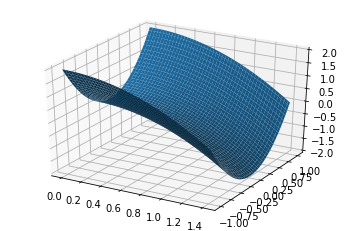

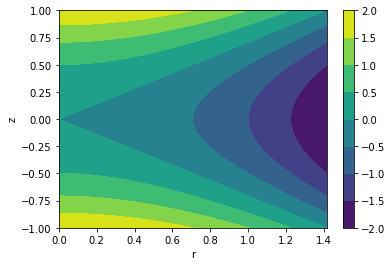

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
z0 = 1
r0 = np.sqrt(2)*z0
r = np.linspace(0, r0, 1001)
z = np.linspace(-z0, z0, 1001)
r,z = np.meshgrid(r,z)
V = 2*z*z - r*r
# Plot a surface
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(r,z,V)
plt.show()
# Plot a contour plot
plt.contourf(r,z,V)
plt.xlabel("r")
plt.ylabel("z")
plt.colorbar()

The E field points from areas of higher potential to lower. A positively charged particle would move with the field. Lets look at r=0. We can see that increasing or decreasing Z would cause the particle to experience a net force in the other direction, accelerating it towards z=0. In vacuum it seems like this could be an infinite loop, moving it up and down. But anything other than r=0 would break that symmetry of potential and cause the particle to move to the right(on the graphs), towards r>0 and lower potential.

## e) Find F

![e](attach/oppge.png)

## f) Plot simulated trajectories

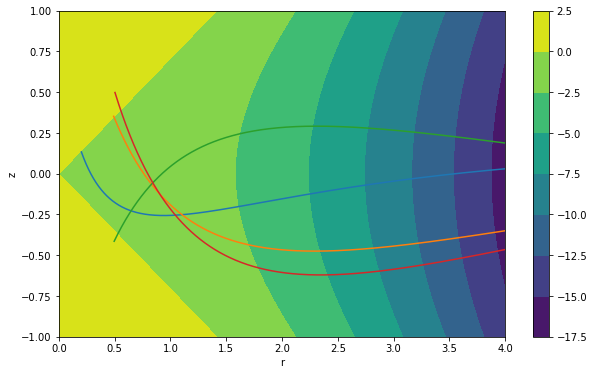

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def particle_trajectory(Nsteps):
    g = np.array([0, 0, -9.81])
    m = 5e-5  # mass of grain of cinnamon
    V0 = 4000  # V
    q_per_m = 1e-4  # C/kg
    q = m * q_per_m
    z0 = 0.005  # Typical size of trap
    r0 = np.sqrt(2) * z0

    dt = 1e-5  # Timestep

    # Initialize trajectory
    r = np.zeros((Nsteps, 3))
    v = np.zeros((Nsteps, 3))
    t = np.zeros(Nsteps)
    r[0, :] = np.random.uniform(-0.5 * z0, 0.5 * z0, size=3)

    # Simulate motion
    for i in range(Nsteps - 1):
        a = 2 * q * V0 / (m * r0 ** 2) * np.array([r[i, 0], r[i, 1], -2 * r[i, 2]]) + g
        v[i + 1, :] = v[i, :] + a * dt
        r[i + 1, :] = r[i, :] + v[i + 1, :] * dt
        t[i + 1] = t[i] + dt
    return r, v, t, z0


#---------------------------
plt.figure(figsize=(10, 6))

for k in range(4):

    stepcount = 4000
    r, v, t, z0 = particle_trajectory(stepcount)
    r = r / z0

    # the plot goes from r=0 to r=4*z0 so here we filter out excess data
    newPoints = []

    for i in range(stepcount):
        rlen = np.sqrt(r[i, 0] ** 2 + r[i, 1] ** 2)
        if rlen <= 4:  # z0=1 in plots
            newPoints.append(r[i])

    newPoints = np.array(newPoints)

    rPoints = np.array(  # compute r values, = x**2 + y**2
        [
            np.sqrt(newPoints[i, 0] ** 2 + newPoints[i, 1] ** 2)
            for i in range(len(newPoints))
        ]
    )

    plt.plot(rPoints, newPoints[:, 2])  # plot(r, z)
#----------------------


z0 = 1
rs = np.linspace(0, 4 * z0, 1001)
zs = np.linspace(-z0, z0, 1001)
rs, zs = np.meshgrid(rs, zs)
Vs = 2 * zs * zs - rs * rs
plt.xlabel("r")
plt.ylabel("z")
plt.contourf(rs, zs, Vs)
plt.colorbar()
plt.show()

As explained, the positive particle is accelerated in the z-direction towards z=0 when z!=0. And in the r-direction towards more positive r's when r != 0. But the graph seems skewed overall and wrong for r>r0. The potential should go to 0 as r increases further, not become more and more negative. We see here that the expression for V isnt meant to be used outside the trap.

## Improving the trap

## g) h)

![gh](attach/oppggh.png)

## i) Plot trajectory

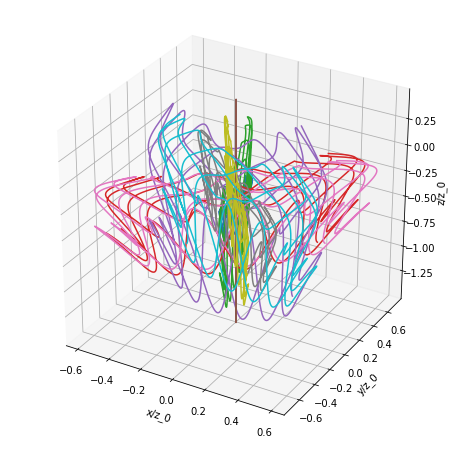

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def particle_trajectory(Nsteps):
    g = np.array([0, 0, -9.81])
    m = 5e-5  # mass of grain of cinnamon
    V0 = 4000  # V
    q_per_m = 1e-4  # C/kg
    q = m * q_per_m
    z0 = 0.005  # Typical size of trap
    r0 = np.sqrt(2) * z0
    omega = 100 * np.pi

    dt = 1e-5  # Timestep

    # Initialize trajectory
    r = np.zeros((Nsteps, 3))
    v = np.zeros((Nsteps, 3))
    t = np.zeros(Nsteps)
    r[0, :] = np.random.uniform(-0.5 * z0, 0.5 * z0, size=3)

    # Simulate motion
    for i in range(Nsteps - 1):
        a = (
            np.cos(omega * t[i])
            * 2
            * q
            * V0
            / (m * r0 ** 2)
            * np.array([r[i, 0], r[i, 1], -2 * r[i, 2]])
            + g
        )
        v[i + 1, :] = v[i, :] + a * dt
        r[i + 1, :] = r[i, :] + v[i + 1, :] * dt
        t[i + 1] = t[i] + dt
    return r, v, t, z0


fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection="3d")
ax.set_xlabel("x/z_0")
ax.set_ylabel("y/z_0")
ax.set_zlabel("z/z_0")
for i in range(10):

    r, v, t, z0 = particle_trajectory(50000) #step count
    r = r / z0
    ax.plot(r[:, 0], r[:, 1], r[:, 2])

plt.show()


Looking at the range of x, y (-0.6 to 0.6) and z axes we can see that the particles are indeed stabilized. Plotting 10 of them and the step count of 50000 ensures that this isnt a fluke and that they actually stay inside for longer periods of time.